Another way of looking at the data in terms of usage is how often events are being reported. At a surface level, it may just seem like this analysis shows only how often events are occurring, but this provides additional information on how frequent ACLED is using news sources in creating the dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf

sql = lambda q: sqldf(q, globals())

extd_df = pd.read_csv('../data/EXPANDED_acled_covid19.csv')

In [3]:
min_dt = min(extd_df.event_date)
max_dt = max(extd_df.event_date)

labs = pd.date_range(start=min_dt,end=max_dt, freq='Q')
lab_int = np.linspace(0, extd_df.event_date.nunique(), len(labs))

Below is a figure that plots the counts of events reported in the dataset per day. We can see that there are apparent periods of downtime and uptime in terms of how often sources are being used.

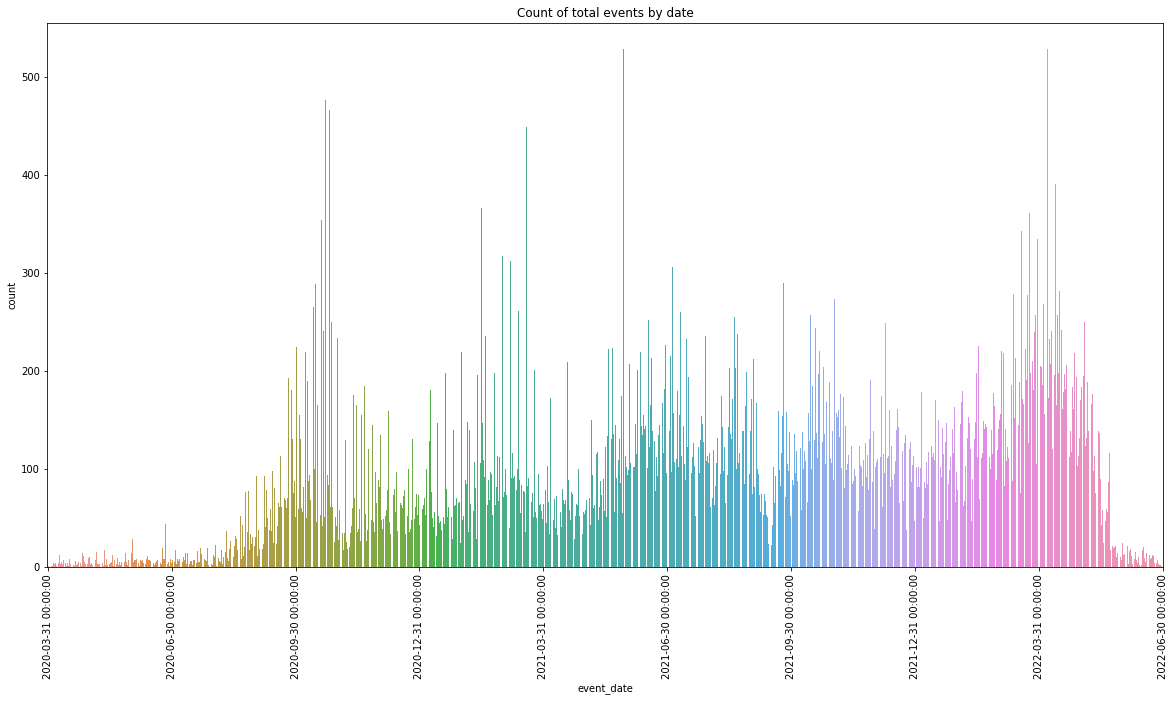

In [4]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title(f'Count of total events by date')
all_plot = sns.countplot(x=extd_df.event_date)
all_plot.set_xticks(lab_int, labels=labs, rotation=90)

We can apply an unsupervised clustering algorithm to cluster the distribution of the dates when sources were used to generate time periods. We use K-Means, since the algorithm should cluster towards a geometric mean for each cluster, capturing different time periods with a low variance.

In [ ]:
from sklearn.cluster import KMeans
from datetime import datetime
import time

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=100, 
    tol=1e-04, random_state=0
)

cluster_df = extd_df
cluster_df.event_date_unix = cluster_df['event_date'].apply(lambda x: pd.Timestamp(x).timestamp())

X = np.array(cluster_df.event_date_unix).reshape(-1, 1)
y_km = km.fit_predict(X)

Specifying four time periods, we apply the K-Means clustering algorithm to event_date and plot the results below.

C:\Users\15714\AppData\Local\Temp/ipykernel_39780/85537550.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cluster_df.event_date_unix = cluster_df['event_date'].apply(lambda x: pd.Timestamp(x).timestamp())


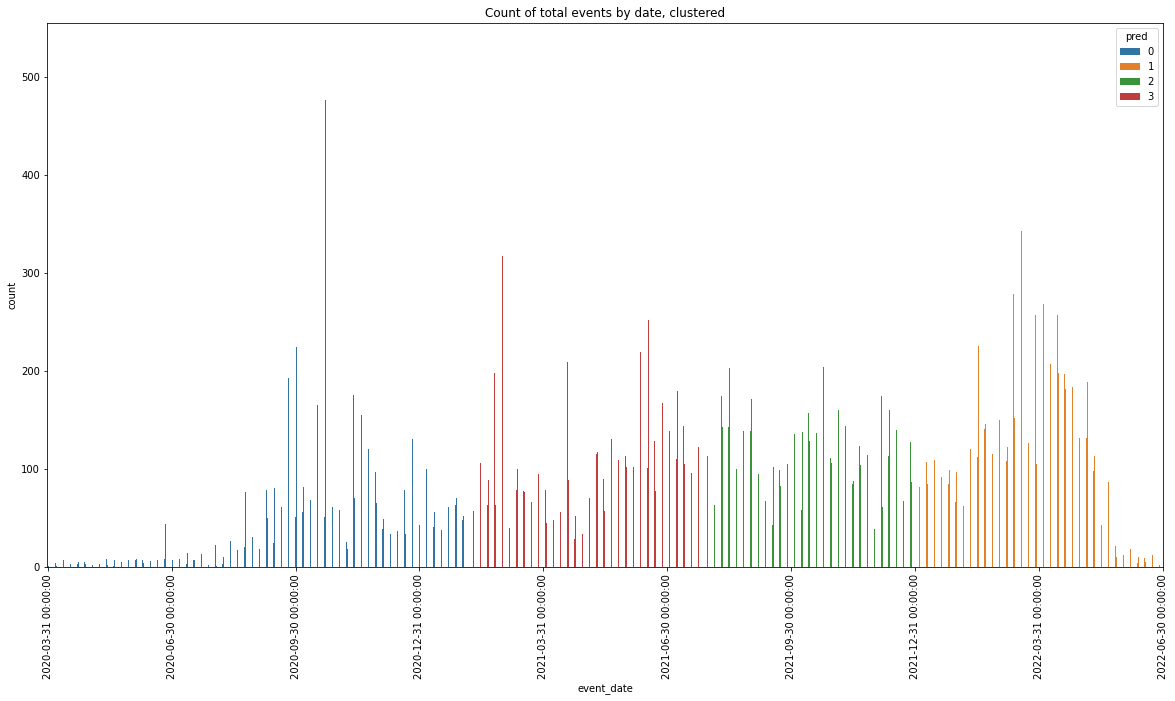

In [6]:
cluster_df['pred'] = y_km
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title(f'Count of total events by date, clustered')
all_plot = sns.countplot(x=cluster_df.event_date, hue=cluster_df.pred)
all_plot.set_xticks(lab_int, labels=labs, rotation=90)